## Fast Style Transfer (TF-Hub)

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [21]:
# 將 tensor 轉換成圖片矩陣
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return tensor

In [22]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [23]:
def process_img(img):
    max_dim = 512
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [24]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

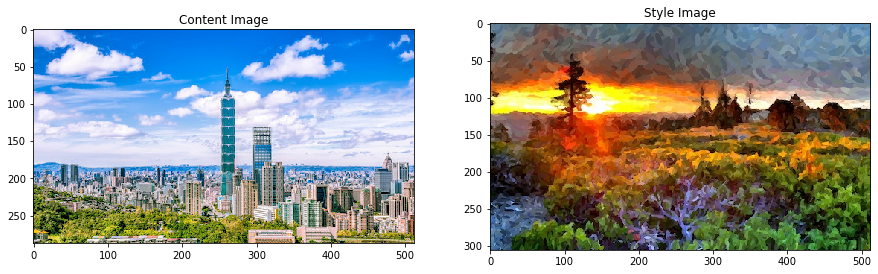

In [25]:
content_image = load_img('data/content.jpeg')
style_image = load_img('data/style3.jpeg')

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [26]:
import tensorflow_hub as hub

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

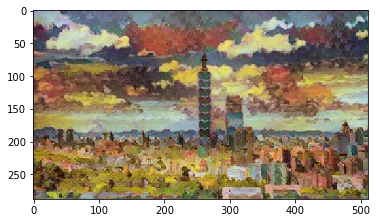

In [27]:
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
result = tensor_to_image(stylized_image)
plt.imshow(result)

In [28]:
import imageio

reader = imageio.get_reader('data/test1.MOV')
fps = reader.get_meta_data()['fps']
writer = imageio.get_writer('./output.mp4', fps=fps)

In [29]:
%%time
index=0
for im in reader:
    if index>0:
        break
    im = np.array(im, dtype='f')/255
    img = process_img(im)
    stylized_image = hub_model(tf.constant(img), tf.constant(style_image))[0]
    result = tensor_to_image(stylized_image)
#     plt.imshow(result)
#     plt.show()
#     index=index+1
    writer.append_data(result)
writer.close()

CPU times: user 7.69 s, sys: 849 ms, total: 8.54 s
Wall time: 11.1 s


In [1]:
from IPython.display import Video

Video("./output.mp4")

In [3]:
%%HTML
<video width="320" height="240" controls>
  <source src="./output.mp4" type="video/mp4">
</video>